In [107]:
%matplotlib inline

import csv
import numpy as np 
import scipy as sp
import pandas as pd
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

In [161]:
PATH = "./movies_csv/"
NUM_OBS = 500

PLOT_DISABLE = 0
PLOT_ENABLE = 1

In [162]:
def getData(file):
    reader=csv.reader(open(file,"rb"),delimiter=',')
    x=list(reader)
    result=np.array(x).astype(np.float32)
    return result

In [163]:
def genC(n, w):
	w_cumul	= w.cumsum()
	c	= np.zeros((1,n))
	w_arr	= pd.Series(w_cumul)
	c 	= [w_arr[(w_arr > np.random.random())].index[0] for i in range(0,n)]		
	return c

In [164]:
def euclid(a,b):
    return np.linalg.norm(a-b)

In [165]:
def kmeans(x, k, iter_num, plot_req):
    ## Function takes inputs:
    ## x --> input data & k--> k value & iter_num --> number of iterations
    ## Returns:
    ## c --> cluster assignment, 
    ## mu--> mean of classes
    ## L --> Objective function value
    d = np.size(x,axis=1)
    n = np.size(x,axis=0)
    mu = np.random.rand(d,k) # 2xk in our case.
    c = np.zeros((n,1))
    L = np.zeros((1,iter_num))
    #print d,n
    
    #int_res = []  # Intermediate x-mu values for all mu.
    
    for i in range(0,iter_num):
            sum = 0
            temp_sum = np.zeros((d,k)) # holds summation xi (c=k)
            n_k = np.zeros(k) #holds nk
            for j in range(0,n):
                int_res = [euclid(x[j,:], mu[:,m])**2 for m in range(0,k)]
                c[j][0] = np.argmin(int_res)
                sum = sum + np.min(int_res)
                allo_k = int(c[j][0])
                n_k[allo_k] = n_k[allo_k]+1
                temp_sum[:,allo_k] = temp_sum[:,allo_k] + x[j,:]
            mu = temp_sum*1.0/n_k    
                
            L[0][i] = L[0][i-1] if np.isnan(sum) else sum 
    if (plot_req):        
        plt.clf()
        plt.scatter(x[:,0], x[:,1], c=c*500)
        plt.plot(mu[0,:],mu[1,:], 'rx')
        plt.title("Scatter plot for k=%d"%k)
        plt.savefig("./images/k_means_scatter_plot_k=%d.jpg"%k)
        plt.show()
    return c, mu , L

In [166]:
def part1():
    print "Running K-means."
    pi = np.array([0.2, 0.5, 0.3])
    c = genC(NUM_OBS,pi)
    mu = [[0,0],[3,0],[0,3]]
    sig = [[[1,0],[0,1]],
          [[1,0],[0,1]],
          [[1,0],[0,1]]]
    n = np.zeros(np.size(pi))
    samples = []
    for i in range(0,len(n)):
        n[i] = sum([elem==i for elem in c])
        samples=samples+list(np.random.multivariate_normal(mean =mu[i], cov=sig[i], size=int(n[i])))
    samples = np.array(samples)
    #print samples
    
    k_val = [2,3,4,5,6]
    L_list = []
    mu_list = []
    c_list = []
    for k in k_val:
        print "k=%d" %k
        c, mu , L = kmeans(samples, k, 20, PLOT_ENABLE)
        c_list.append(c)
        mu_list.append(mu)
        L_list.append(L)
        #print L
    #print L_list
    
    plt.clf()
    for idx,L in enumerate(L_list):
    #    print str(idx+2) +":"
    #    print (L[0])
        
        plt.plot(L[0], label="L=%d"%(idx+2))
    
    plt.xlabel("Iteration Number")
    plt.ylabel("L values")
    plt.title("Plot of Objective Functions")
    plt.legend(loc='upper right', shadow=True)
    plt.savefig("./images/k_means_L_plot.jpg")
    plt.show()
    
    '''
    for idx,mu in enumerate(mu_list):
    #    print str(idx+2) +":"
    #    print (L[0])
        plt.clf()
        plt.plot(mu[0,:],mu[1,:], 'rx')
        plt.scatter(samples[:,0],samples[:,1], c = c_list[idx]*255)
        plt.xlabel("X_1 value")
        plt.ylabel("X_2 value")
        plt.title("Scatter plot , \mu plot k=%d"%(idx+2))
        plt.legend(loc='upper right', shadow=True)
        plt.savefig("./images/k_means_scatter_plot_k_"+str(idx+2)+".jpg")
        plt.show()
    '''
    

In [167]:
def part2():
    print "Implementing Matrix Factorization"
    

In [168]:
def main():
    part1()
    part2()

Running K-means.
k=2


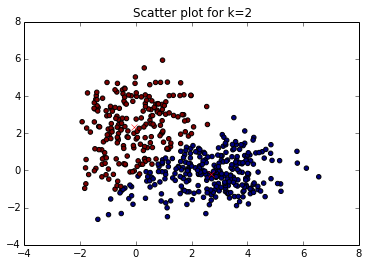

k=3


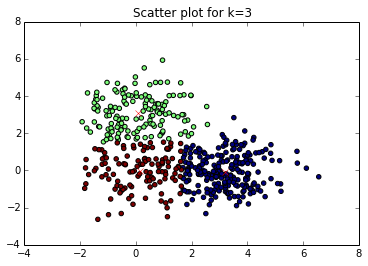

k=4


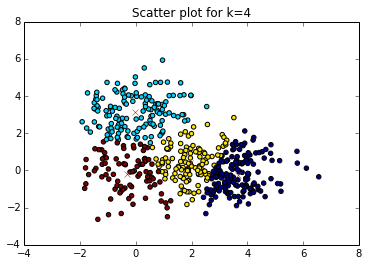

k=5


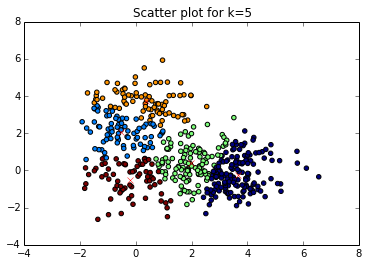

k=6


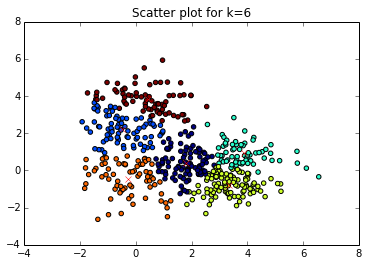

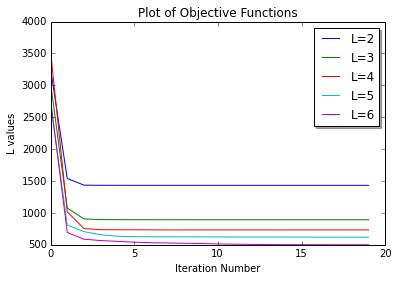

Implementing Matrix Factorization


In [169]:
main()